In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

2024-06-11 14:30:12.666426: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 14:30:12.666571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 14:30:12.839950: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
train_data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
labels = train_data['label'].values
labels = to_categorical(labels, num_classes=10)

In [6]:
pixels = train_data.drop(columns=["label"]).values

In [7]:
labels.shape

(42000, 10)

In [8]:
pixels.shape

(42000, 784)

In [9]:
#Normalize to values between 0 and 1
pixels = pixels / 255
print(pixels[pixels>0])

[0.7372549  1.         0.36862745 ... 0.29019608 0.98039216 0.23137255]


## Creating a simple MLP Network for the MNIST Data ##

In [10]:
input_shape=(784,)
model_1 = Sequential()
model_1.add(Dense(256,activation='relu', input_shape=input_shape))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(64, activation="relu"))
model_1.add(Dense(10, activation="softmax"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model_1.compile(
    optimizer=Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# makes sure to keep model with best weights:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',   # observe validation loss
    patience=15,           #tolerance
     min_delta=0.01, # bit small? but pushes result's accuracy 
    restore_best_weights=True  # keep best weights
)

In [14]:
history = model_1.fit(
    pixels,
    labels,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8478 - loss: 0.5009 - val_accuracy: 0.9589 - val_loss: 0.1329
Epoch 2/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9666 - loss: 0.1115 - val_accuracy: 0.9563 - val_loss: 0.1386
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9787 - loss: 0.0670 - val_accuracy: 0.9699 - val_loss: 0.1040
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9833 - loss: 0.0518 - val_accuracy: 0.9679 - val_loss: 0.1099
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9866 - loss: 0.0401 - val_accuracy: 0.9673 - val_loss: 0.1219
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9886 - loss: 0.0342 - val_accuracy: 0.9701 - val_loss: 0.1123
Epoch 7/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9916 - loss: 0.0256 - val_accuracy: 0.9580 - val_loss: 0.1574
Epoch 8/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9926 - loss: 0.0237 - 

### Results ###

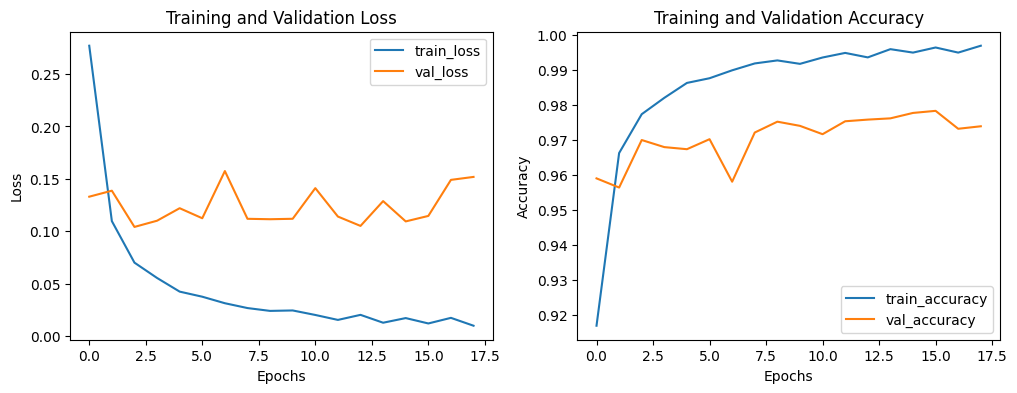

In [15]:
import matplotlib.pyplot as plt

# plotting loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# plotting Accuracies
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


plots look a bit unusual because early stopping stops within first few epochs but difference between training and validation isn't as big as it seems first sight. 

# Creating a CNN for MNIST dataset 

In [16]:
pixels.shape

(42000, 784)

In [17]:
#CNN will need 2d data  
pixels2d = pixels.reshape(-1,28,28,1) # 4args: flex ,28x28, 1 channel (bc grey levels, not rgb)

In [18]:
input_shape= pixels2d.shape[1:] #exclude number of pictures (previously flex)

In [19]:
kernel_size = (3,3)

model_2 = Sequential()

# base

#1st conv+maxpooling block
model_2.add(Conv2D(filters=32, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
model_2.add(MaxPooling2D(pool_size=(2,2)))
#2nd to conv+maxpooling block
model_2.add(Conv2D(filters=32, kernel_size=kernel_size, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Flatten())

#head (makes decision based on preprocessing made by base)
model_2.add(Dense(16, activation="relu"))
model_2.add(Dense(10, activation="softmax"))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model_2.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │        12,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,554 (88.10 KB)

 Trainable params: 22,554 (88.10 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model_2.fit(
    pixels2d,
    labels,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.7888 - loss: 0.6783 - val_accuracy: 0.9640 - val_loss: 0.1114
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9677 - loss: 0.1066 - val_accuracy: 0.9775 - val_loss: 0.0741
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9776 - loss: 0.0730 - val_accuracy: 0.9832 - val_loss: 0.0567
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9829 - loss: 0.0550 - val_accuracy: 0.9837 - val_loss: 0.0551
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9860 - loss: 0.0441 - val_accuracy: 0.9833 - val_loss: 0.0567
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9884 - loss: 0.0382 - val_accuracy: 0.9813 - val_loss: 0.0644
Epoch 7/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9906 - loss: 0.0338 - val_accuracy: 0.9857 - val_loss: 0.0470
Epoch 8/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9915 -

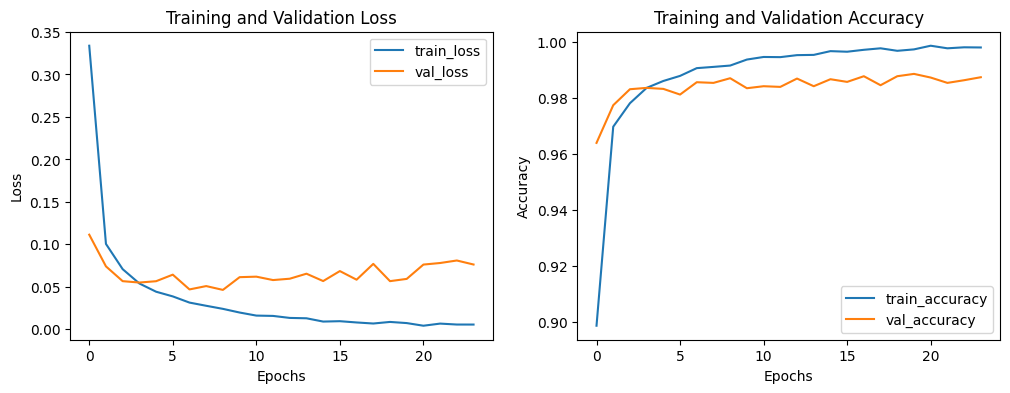

In [22]:

# plotting loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# plotting Accuracies
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()